In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn

In [2]:
np.random.seed(120)

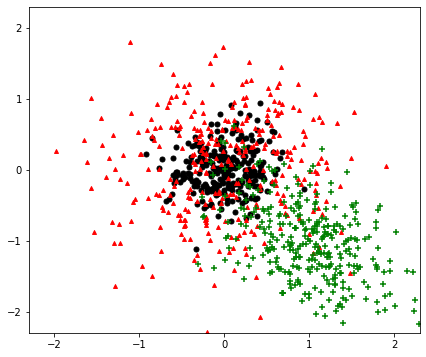

In [3]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

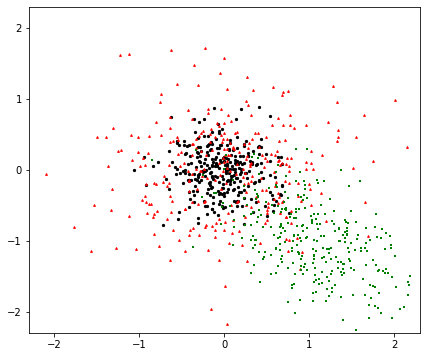

In [4]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=5)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=3)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=8)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

https://stackoverflow.com/questions/23204320/drawing-decision-boundary-of-two-multivariate-gaussian-in-python

https://stackoverflow.com/questions/19576761/drawing-decision-boundary-of-two-multivariate-gaussian

https://xavierbourretsicotte.github.io/Optimal_Bayes_Classifier.html

https://xavierbourretsicotte.github.io/LDA_QDA.html

https://stackoverflow.com/questions/11615664/multivariate-normal-density-in-python

https://www.geeksforgeeks.org/visualizing-the-bivariate-gaussian-distribution-in-python/

https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

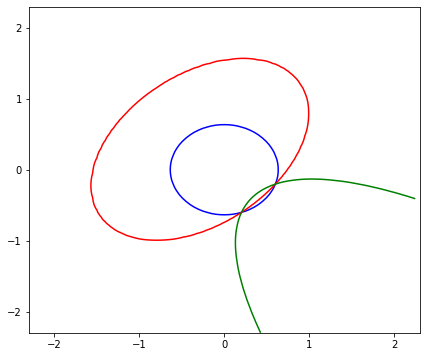

In [5]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


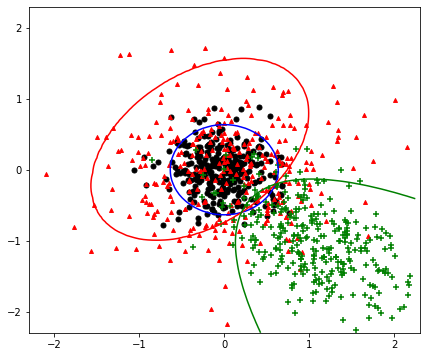

In [6]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


In [7]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def compare_find_equals(number_a, number_b, number_c):
    if abs(number_a - number_b) / number_a <= 0.1 and abs(number_a - number_c) / number_a <= 0.1:
        print(number_a)
        return 1
    return 0
    
feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
matrix_a = np.vectorize(dist_1)(grid_X, grid_Y)
matrix_b = np.vectorize(dist_2)(grid_X, grid_Y)
matrix_c = np.vectorize(dist_3)(grid_X, grid_Y)
np.vectorize(compare_find_equals)(matrix_a, matrix_b, matrix_c)

0.21539279301848246
0.21539279301849612


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
def find_intersection_points(_px, _py, number_a):
    if dist_1(_px, _py) == number_a:
        print(_px, _py)
        return 1
    return 0

np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301848246)
print("\n######\n")
np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301849612)

0.1999999999999913 -0.6000000000000059
-0.6000000000000059 0.1999999999999913

######

0.5999999999999899 -0.20000000000000728
-0.20000000000000728 0.5999999999999899


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
p_intersection_1 = (0.2, -0.6)
p_intersection_2 = (0.6, -0.2)

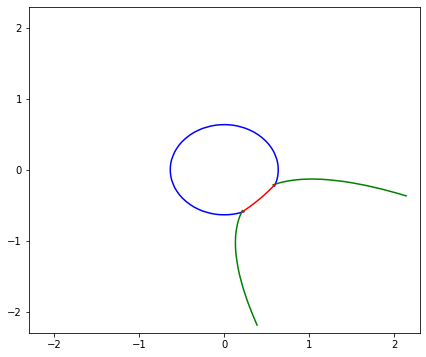

In [10]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

# https://matplotlib.org/2.0.2/examples/pylab_examples/contourf_demo.html
def cut_off_decision_boudary_within_rec(_grid_X, _grid_Y, matrix):
    def cut_within_rec(_px, _py, _element):
        if(0.2 < _px < 0.6 - 0.05 and -0.6 < _py < -0.2 - 0.05):
            return np.nan
        else:
            return _element
    return np.vectorize(cut_within_rec)(_grid_X, _grid_Y, matrix)
        
feature_x = np.arange(-2.2, 2.2, 0.05)
feature_y = np.arange(-2.2, 2.2, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)


feature_x_rec = np.arange(0.2, 0.61, 0.01)
feature_y_rec = np.arange(-0.6, -0.19, 0.01)
[grid_X_rec, grid_Y_rec] = np.meshgrid(feature_x_rec, feature_y_rec)

fig, ax = plt.subplots(1, 1)
_Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
Z12 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z12)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
_Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
Z23 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z23)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

Z13 = decision_boudary(dist_1, dist_3, grid_X_rec, grid_Y_rec)
ax.contour(grid_X_rec, grid_Y_rec, Z13, [0], colors='red')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

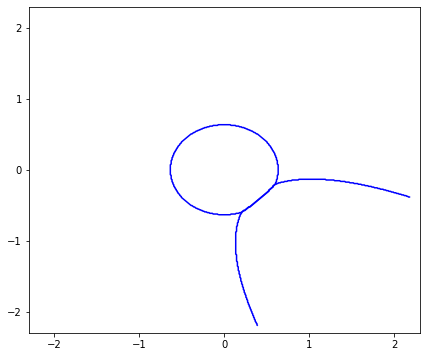

In [11]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

# https://stackoverflow.com/questions/48639028/
def compare_and_assign_value(number_a, number_b, number_c):
    z = np.array([number_a, number_b, number_c])
    return np.argmax(z) + 1
    
def decision_boudary(func_a, func_b, func_c, _grid_X, _grid_Y):
    matrix_a = np.vectorize(func_a)(_grid_X, _grid_Y)
    matrix_b = np.vectorize(func_b)(_grid_X, _grid_Y)
    matrix_c = np.vectorize(func_c)(_grid_X, _grid_Y)
    return np.vectorize(compare_and_assign_value)(matrix_a, matrix_b, matrix_c)
    

feature_x = np.arange(-2.2, 2.2, 0.01)
feature_y = np.arange(-2.2, 2.2, 0.01)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z = decision_boudary(dist_1, dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


We can't use dropout with MLPClassifier.

https://datascience.stackexchange.com/questions/24275/scikit-mlpclassifier-vs-tensorflow-dnnclassifier

https://github.com/scikit-learn/scikit-learn/issues/6175

So we will use Keras instead.

https://keras.io/examples/vision/mnist_convnet/


In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                Activation, ActivityRegularization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import regularizers

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X)

In [14]:
y_train = to_categorical(y - 1, num_classes=3, dtype ="uint8")

In [15]:
(y - 1)[:10]

array([1, 2, 1, 1, 1, 0, 1, 1, 2, 1])

In [16]:
y[:10]

array([2, 3, 2, 2, 2, 1, 2, 2, 3, 2])

In [17]:
y_train[:10]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [18]:
X_train.shape

(900, 2)

In [19]:
X_train

array([[-1.74733404, -0.03974217],
       [ 0.10307963, -1.78392385],
       [-1.60114602, -0.3929787 ],
       ...,
       [ 0.50402131, -0.74188465],
       [-0.32381147,  0.10671383],
       [-0.00644812,  2.13297268]])

In [20]:
y_train

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [21]:
num_labels = len(np.unique(y))
num_labels

3

https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t

https://keras.io/api/layers/regularizers/

https://stackoverflow.com/questions/44495698/keras-difference-between-kernel-and-activity-regularizers

https://stackoverflow.com/questions/50630849/how-does-tf-keras-layers-activityregularization-work-and-how-to-use-it-correct

In [22]:
model = keras.Sequential(
    [
        InputLayer(2),
        Dense(20, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="relu", kernel_regularizer=regularizers.L2(0.5)),
        Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
9/9 [==============================] - 1s 2ms/step - loss: 7.5951 - accuracy: 0.3678
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 7.1888 - accuracy: 0.3767
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 6.8134 - accuracy: 0.3889
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 6.4304 - accuracy: 0.4133
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 6.0938 - accuracy: 0.4533
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 5.7703 - accuracy: 0.4833
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 5.4743 - accuracy: 0.4733
Epoch 8/1000
9/9 [==============================] - 0s 2ms/step - loss: 5.1790 - accuracy: 0.4989
Epoch 9/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.9241 - accuracy: 0.5211
Epoch 10/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.6572 - accuracy: 0.5256
Epoch 11/1000
9/9 [

9/9 [==============================] - 0s 2ms/step - loss: 0.8083 - accuracy: 0.6567
Epoch 84/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.8172 - accuracy: 0.6544
Epoch 85/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.8146 - accuracy: 0.6444
Epoch 86/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7933 - accuracy: 0.6600
Epoch 87/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.6467
Epoch 88/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.8050 - accuracy: 0.6656
Epoch 89/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7998 - accuracy: 0.6700
Epoch 90/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.6644
Epoch 91/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7960 - accuracy: 0.6622
Epoch 92/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7991 - accuracy: 0.6622
Epoch 93/1000
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.7366 - accuracy: 0.6800
Epoch 165/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7428 - accuracy: 0.6778
Epoch 166/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7266 - accuracy: 0.6833
Epoch 167/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7296 - accuracy: 0.6900
Epoch 168/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7318 - accuracy: 0.6822
Epoch 169/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.6944
Epoch 170/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.6767
Epoch 171/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.6844
Epoch 172/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7341 - accuracy: 0.6867
Epoch 173/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7277 - accuracy: 0.6900
Epoch 174/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.7011
Epoch 247/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.7067
Epoch 248/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.7067
Epoch 249/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.7056
Epoch 250/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.6944
Epoch 251/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.7133
Epoch 252/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.7122
Epoch 253/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.6944
Epoch 254/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.6978
Epoch 255/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.7033
Epoch 256/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.7089
Epoch 328/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.7000
Epoch 329/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.7056
Epoch 330/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.7056
Epoch 331/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6967
Epoch 332/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.7089
Epoch 333/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.7144
Epoch 334/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.7122
Epoch 335/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.6933
Epoch 336/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.7189
Epoch 337/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.7133
Epoch 409/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.7178
Epoch 410/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6956
Epoch 411/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.7122
Epoch 412/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7178
Epoch 413/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7078
Epoch 414/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.7211
Epoch 415/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.7333
Epoch 416/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7256
Epoch 417/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7256
Epoch 418/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7178
Epoch 491/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.7178
Epoch 492/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7167
Epoch 493/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.7189
Epoch 494/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7333
Epoch 495/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7100
Epoch 496/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.7156
Epoch 497/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.7178
Epoch 498/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.7267
Epoch 499/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7456
Epoch 500/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.7233
Epoch 571/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7200
Epoch 572/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7156
Epoch 573/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7089
Epoch 574/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7233
Epoch 575/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.7033
Epoch 576/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7267
Epoch 577/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7367
Epoch 578/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.7144
Epoch 579/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7222
Epoch 580/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.7189
Epoch 653/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.7178
Epoch 654/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7244
Epoch 655/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.7244
Epoch 656/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.7178
Epoch 657/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7267
Epoch 658/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.7267
Epoch 659/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.7256
Epoch 660/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.7244
Epoch 661/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7333
Epoch 662/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7256
Epoch 735/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7167
Epoch 736/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7056
Epoch 737/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7311
Epoch 738/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7044
Epoch 739/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.7233
Epoch 740/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.7278
Epoch 741/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7333
Epoch 742/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.7378
Epoch 743/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.7244
Epoch 744/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7156
Epoch 816/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7367
Epoch 817/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7200
Epoch 818/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7178
Epoch 819/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.7056
Epoch 820/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7233
Epoch 821/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.7300
Epoch 822/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.7233
Epoch 823/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7211
Epoch 824/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.7356
Epoch 825/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7211
Epoch 898/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.7244
Epoch 899/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.7222
Epoch 900/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7100
Epoch 901/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.7300
Epoch 902/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.7144
Epoch 903/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.7278
Epoch 904/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7422
Epoch 905/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7167
Epoch 906/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7122
Epoch 907/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7233
Epoch 980/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7233
Epoch 981/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7344
Epoch 982/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7267
Epoch 983/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7311
Epoch 984/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7344
Epoch 985/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7167
Epoch 986/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7267
Epoch 987/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7233
Epoch 988/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7300
Epoch 989/1000


In [25]:
score = model.evaluate(X_train, y_train, verbose=1)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

29/29 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.7400
Train loss: 0.5960546135902405
Train accuracy: 0.7400000095367432


In [26]:
feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

list_class_result_x = [[], [], []]
list_class_result_y = [[], [], []]

def get_predict_result(_px, _py):
    which = np.argmax(model.predict(
        scaler.transform([[_px, _py]]))[0])
    list_class_result_x[which].append(_px)
    list_class_result_y[which].append(_py)
    return which + 1

Z = np.vectorize(get_predict_result)(grid_X, grid_Y)

Z

array([[2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

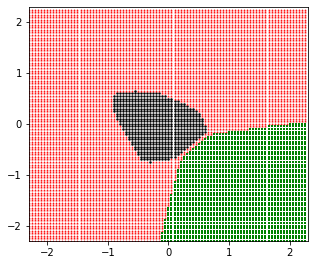

In [27]:
fig, ax = plt.subplots()
plt.scatter(np.array(list_class_result_x[0]), 
            np.array(list_class_result_y[0]), c='k', marker='o', s=2)
plt.scatter(np.array(list_class_result_x[1]), 
            np.array(list_class_result_y[1]), c='r', marker='^', s=1)
plt.scatter(np.array(list_class_result_x[2]), 
            np.array(list_class_result_y[2]), c='g', marker='+', s=3)
fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

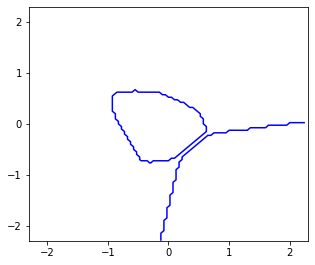

In [28]:
fig, ax = plt.subplots()

ax.contour(grid_X, grid_Y, Z, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                Activation, ActivityRegularization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal

mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

def get_predict_result(_px, _py):
    which = np.argmax(model.predict(
        scaler.transform([[_px, _py]]))[0])
    list_class_result_x[which].append(_px)
    list_class_result_y[which].append(_py)
    return which + 1

DEBUG = True

for i in range(10000):
    if not DEBUG:
        break
    np.random.seed(i)
    X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)
    scaler = StandardScaler().fit(X)
    X_train = scaler.transform(X)
    y_train = to_categorical(y - 1, num_classes=3, dtype ="uint8")
    num_labels = len(np.unique(y))

    model = keras.Sequential(
        [
            InputLayer(2),
            Dense(20, activation="relu"),
            Dropout(0.5),
            Dense(10, activation="relu", kernel_regularizer=regularizers.L2(0.5)),
            Dense(num_labels, activation="softmax"),
        ]
        )
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=1000, batch_size=100)
    feature_x = np.arange(-2.3, 2.3, 0.02)
    feature_y = np.arange(-2.3, 2.3, 0.02)
    [grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

    list_class_result_x = [[], [], []]
    list_class_result_y = [[], [], []]

    Z = np.vectorize(get_predict_result)(grid_X, grid_Y)
    fig, ax = plt.subplots()

    ax.contour(grid_X, grid_Y, Z, levels=[1.5, 2.5, 3.5], colors='b')

    fig.set_size_inches(5, 4.3)
    plt.xlim([-2.3, 2.3])
    plt.ylim([-2.3, 2.3])
    plt.savefig(str(i) + '.png', bbox_inches='tight')


SyntaxError: 'return' outside function (<ipython-input-30-ff6964cbf412>, line 49)